In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import pt
import numpy as np
pt.darkmode()

# Vaccinations

In [115]:
data=pd.read_table('https://impfdashboard.de/static/data/germany_vaccinations_timeseries_v2.tsv')
data['date'] = pd.to_datetime(data['date'])

data["erst_daily"] = data.dosen_erst_kumulativ.diff(1)
data["zweit_daily"] = data.dosen_zweit_kumulativ.diff(1)
data["dritt_daily"] = data.dosen_dritt_kumulativ.diff(1)

data["erst_rollingmean"] = data.rolling(window=7)["erst_daily"].mean()
data["zweit_rollingmean"] = data.rolling(window=7)["zweit_daily"].mean()
data["dritt_rollingmean"] = data.rolling(window=7)["dritt_daily"].mean()


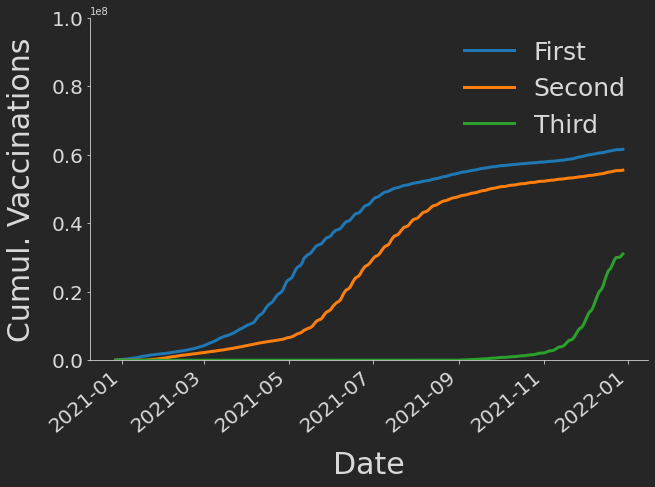

In [116]:
fig, ax = pt.singleplot()
pt.majorline(ax, data.date, data.dosen_erst_kumulativ, label="First")
pt.majorline(ax,data.date, data.dosen_zweit_kumulativ, label="Second")
pt.majorline(ax,data.date, data.dosen_dritt_kumulativ, label="Third")

fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, "Date", "Cumul. Vaccinations")
pt.limits(ax, None, (0,1e8))


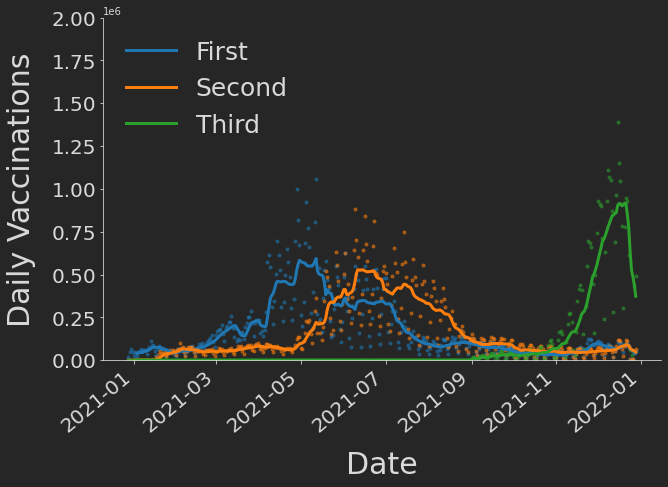

In [117]:
fig, ax = pt.singleplot()
pt.polyscatter(ax,data.date, data.erst_daily)
pt.polyscatter(ax,data.date, data.zweit_daily)
pt.polyscatter(ax,data.date, data.dritt_daily)

pt.majorline(ax,data.date, data.erst_rollingmean, label="First")
pt.majorline(ax,data.date, data.zweit_rollingmean, label="Second")
pt.majorline(ax,data.date, data.dritt_rollingmean, label="Third")


fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, "Date", "Daily Vaccinations")
ymax = np.max([np.max(data.erst_daily), np.max(data.zweit_daily), np.max(data.dritt_daily)])
ymax = round(ymax, -6)+1000000
pt.limits(ax, None, (0,ymax))


# Cases

In [119]:
data=pd.read_table('https://raw.githubusercontent.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung/main/Nowcast_R_aktuell.csv',\
                  sep=",")
data['Datum'] = pd.to_datetime(data['Datum'])


No handles with labels found to put in legend.


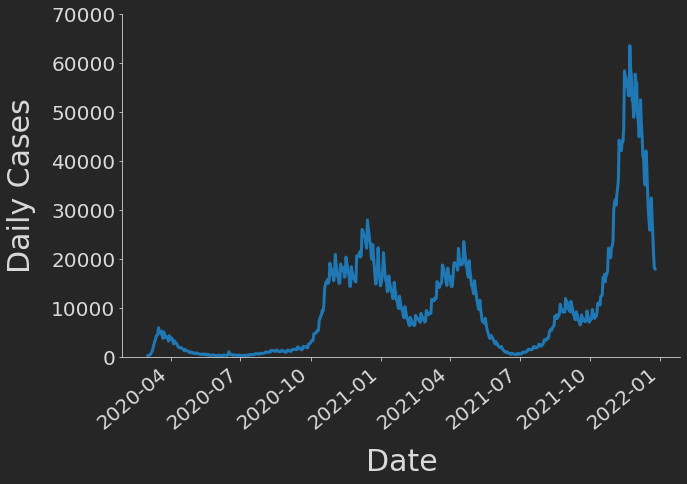

In [120]:
fig, ax = pt.singleplot()
pt.majorline(ax, data.Datum, data.PS_COVID_Faelle)

fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, "Date", "Daily Cases")
ymax = round(max(data.PS_COVID_Faelle), -4)+10000
pt.limits(ax, None, (0, ymax))


# Intensive Care Beds

In [134]:
data=pd.read_table('https://diviexchange.blob.core.windows.net/%24web/zeitreihe-tagesdaten.csv',\
                  sep=",")

data['date'] = pd.to_datetime(data['date'])
data = data.drop(columns=['bundesland', 'gemeindeschluessel', 'anzahl_standorte',
       'anzahl_meldebereiche'])
data = data.groupby("date").sum()
data['date'] = data.index

data["betten_sum"] = data["betten_frei"] + data["betten_belegt"]


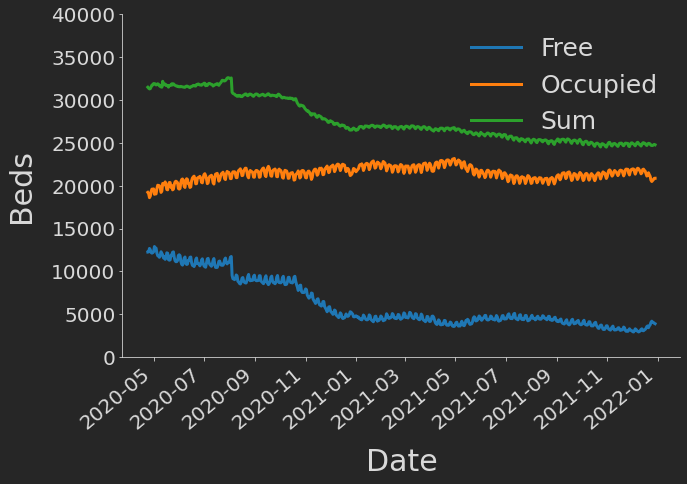

In [143]:
fig, ax = pt.singleplot()
pt.majorline(ax, data.date, data.betten_frei, label="Free")
pt.majorline(ax, data.date, data.betten_belegt, label="Occupied")
pt.majorline(ax, data.date, data.betten_sum, label="Sum")

fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')
pt.despine(ax)
pt.ticklabelsize(ax)
pt.legend(ax)
pt.labels(ax, "Date", "Beds")
ymax = round(np.max([np.max(data.betten_frei), np.max(data.betten_belegt), np.max(data.betten_sum)]), -4)+10000
pt.limits(ax, None, (0, ymax))
